# Math 387 Honours Numerical Analysis Midterm
## Shenshun Yao 260709204

## Part 1 Theory

### (a.)
Proof: Since $f(x) \in \mathbb C^3$, then $f'''(x)$ is continuous at all $x \in [-a,a]$.
Then we expanding $f(h)$ and $f(-h)$ about x=0, $\exists \xi_1 \in (0,h),\xi_2 \in (-h,0)$ 
$$f(h） = f(0) + hf'(0) + \frac{1}{2} h^2f''(0) + \frac{1}{6}h^3f'''(\xi_1),$$

$$f(-h） = f(0) - hf'(0) + \frac{1}{2} h^2f''(0) - \frac{1}{6}h^3f'''(\xi_2),$$

$$\implies f(h) - f(-h) = 2hf'(0) + \frac{1}{6}h^3 [f(\xi_1)+f(\xi_2)].$$

By Intermediate Value Theorem,there exists $\xi \in (-h,h)$, s.t. $f'''(\xi)=\frac{f'''(\xi_1) + f'''(\xi_2)}{2}$. Therefore, we have

$$\widetilde{D}_h - f'(0) = \frac{f(h) - f(-h)}{2} + \frac{\delta f(h) - \delta f(-h)}{2} - f'(0) = \frac{h^2}{12}[f'''(\xi_1) + f'''(\xi_2)] +  \frac{\delta f(h) - \delta f(-h)}{2} = \frac{h^2}{6}f'''(\xi_) + \frac{\delta f(h) - \delta f(-h)}{2} ,$$

thus the proof ended.

### (b.)
proof: Take the absoluate value on the both sides of $\widetilde{D}_h - f'(0) = \frac{h^2}{6}f'''(\xi_) + \frac{\delta f(h) - \delta f(-h)}{2}$,since $\left| \delta f(x)\right| \leq \epsilon$ for $x \in (-a,a)$, then we have $\left|\widetilde{D}_h - f'(0)\right| \leq \frac{\epsilon}{h} + \frac{h^2M}{6}$ where $M =\max_{x \in [-a,a]}\left| f'''(x)\right |$.

Supposing that $\epsilon$ and $M$ is fixed, then $B(h)$ is a convex function that always larger than $0$ and attains $+\infty$ when $h \rightarrow 0$ and $h \rightarrow +\infty$. The graph will be plotted below.

Since $B(h) = \frac{\epsilon}{h} + \frac{h^2M}{6}$, take its derivative equals to $0$ which yields the minimum value of $B(h)$.

 $$B'(h) = \frac{hM}{3} - \frac{\epsilon}{h^2} \implies h = (\frac{3\epsilon}{M})^{\frac{1}{3}}.$$
 
If we take $h$ too small, our approximation to $f'(0)$, $\widetilde{D}_h$ will have a very large error thus it's a poor approximation,that's why it is not a good idea to choose $h$ too small.

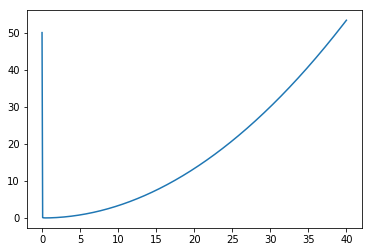

In [1]:
import numpy as np
import matplotlib.pyplot as plt
h = np.linspace(0.0002,40,500)
y = 0.01/h + (0.2*h**2)/6
plt.plot(h,y)
plt.show()

## Part 2 Lab

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.special

### (a). Illustrate Runge Phenomenon by Lagrange Interpolation with equally spaced nodes

Here we define a function $f(x) = \frac{1}{\pi + 50x^2}$ lies in the range $[-1,1]$ with equally spaced nodes.

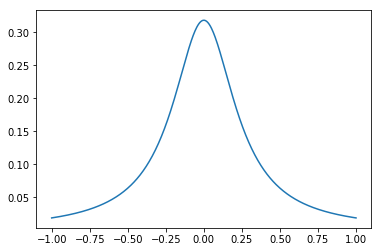

In [3]:
x = np.linspace(-1,1,500)
y = 1/(math.pi+50*x**2)
plt.plot(x,y)
plt.show()

Then we construct Lagrange polynomial of degree N at N+1 points. We will use polyfit although the problem occurs with Lagrange polynomial interpolation as well.

In [4]:
N = 15
xdata = np.linspace(-1,1,N+1)
ydata = 1/(math.pi+50*xdata**2)
p = np.polyfit(xdata,ydata,N)

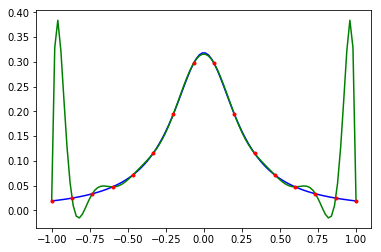

In [5]:
x = np.linspace(-1,1,100)
y = 1/(math.pi+50*x**2)
plt.plot(x,y,'b')
y_fit = np.polyval(p,x)
Lagrangepoly = plt.plot(x,y_fit,'g');
plt.plot(xdata,ydata,'r.')
plt.show()

Therefore we can see Runge phenomenon very clearly.

### (b). Lagrange Interpolation with Chebyshev nodes

In [6]:
N = 15
t = np.linspace(0,math.pi,N+1)
xdata = -np.cos(t)
ydata = 1/(math.pi+50*xdata**2)
p = np.polyfit(xdata,ydata,N)

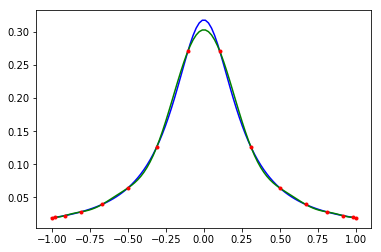

In [7]:
x = np.linspace(-1,1,100)
y = 1/(math.pi+50*x**2)
plt.plot(x,y,'b')
y_fit = np.polyval(p,x)
Lagrangepoly = plt.plot(x,y_fit,'g');
plt.plot(xdata,ydata,'r.')
plt.show()

It can be easily observed that Chebyshev nodes approximate the $f(x)$ much better than equally spaced nodes.

### (c). Bernstein Interpolation with equally spaced nodes

In [8]:
def f(x):
    return(1/(math.pi+50*x**2))

In [9]:
def Bernsteinbasis(n,v,x):
    return scipy.special.binom(n,v)*(x)**(v)*(1-x)**(n-v)

In [10]:
def Bernsteinpoly(n,x):
    B = 0
    for v in range(0,n+1):
        B = B + f(v/n)* Bernsteinbasis(n,v,x) 
    return B

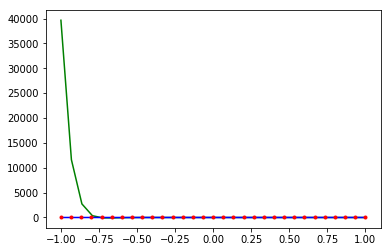

In [11]:
N = 30
xdata = np.linspace(-1,1,N+1)
ydata = 1/(math.pi+50*xdata**2)
x = np.linspace(-1,1,30)
plt.plot(x,Bernsteinpoly(30,x),'g')
plt.plot(x,f(x),'b')
plt.plot(xdata,ydata,'r.')
plt.show()

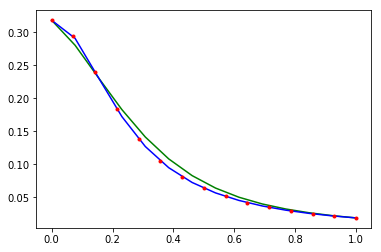

In [12]:
N = 14
xdata = np.linspace(0,1,N+1)
ydata = 1/(math.pi+50*xdata**2)
x = np.linspace(0,1,14)
plt.plot(x,Bernsteinpoly(14,x),'g')
plt.plot(x,f(x),'b')
plt.plot(xdata,ydata,'r.')
plt.show()

It can be easily observed that Bernstein polynomials approximate the $f(x)$ very well in $[0,1]$, but in $[-1,0]$ the error is very big.